<a href="https://colab.research.google.com/github/satria080503/MachineLearning_Ganjil2023/blob/main/Jobsheet3_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LAB WORK 1

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = 'C:\Machine Learning\week3\dataset.csv' #declare data set excel
df = pd.read_csv(data)

In [ ]:
# inspect first data
df.head()

# check data size
df.shape

# check general information
df.info()

# check data description
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


c:\Users\ACER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


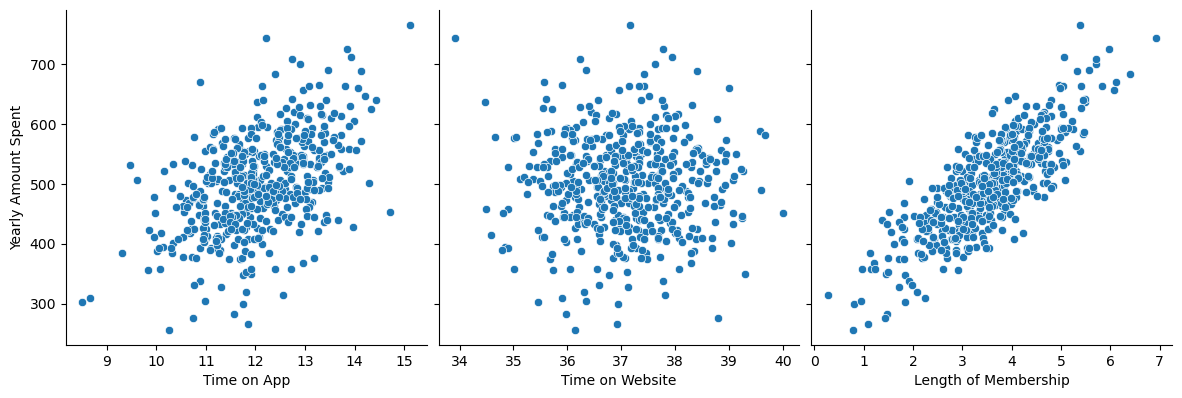

C:\Users\ACER\AppData\Local\Temp\ipykernel_6168\263916300.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


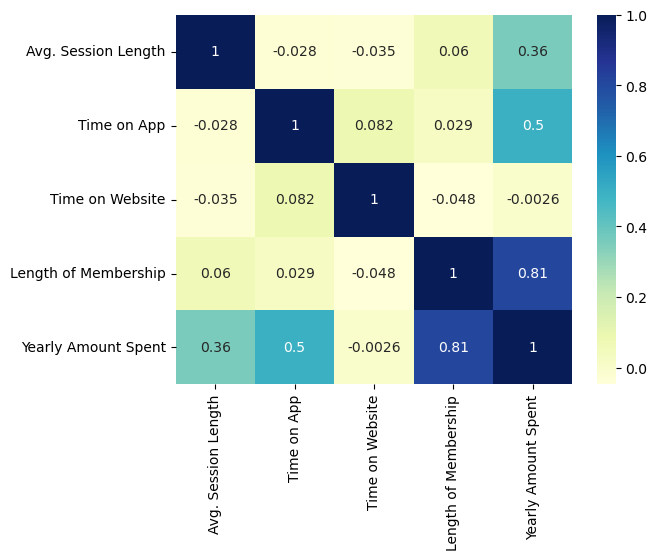

In [ ]:
# import library
import matplotlib.pyplot as plt
import seaborn as sns

# visualize the data using pairplot
sns.pairplot(df, x_vars=['Time on App', 'Time on Website', 'Length of Membership'],
             y_vars='Yearly Amount Spent', size=4, aspect=1, kind='scatter')
plt.show()

# visualize the data correlation using heatmaps
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

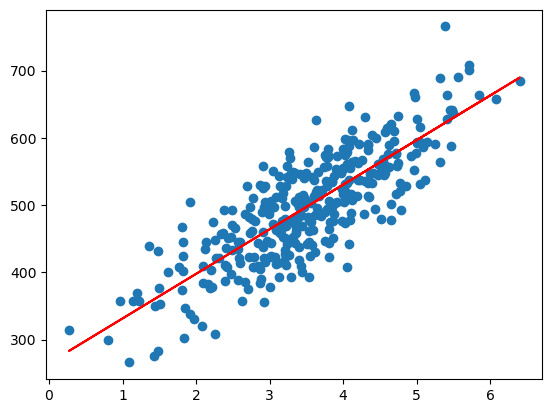

In [ ]:
# 1 Inspect the independent and dependend variables
# X is independen variabel, Y is dependen variable
X = df['Length of Membership']
y = df['Yearly Amount Spent']

# 2 Split training and testing data
# Split trining and testin data using 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# 3 Build Regression Model
# Training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

# 4 Visualize Model
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_6168\42056552.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins=15)


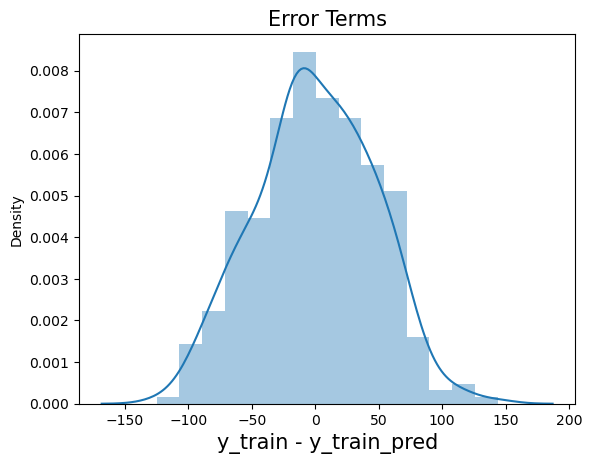

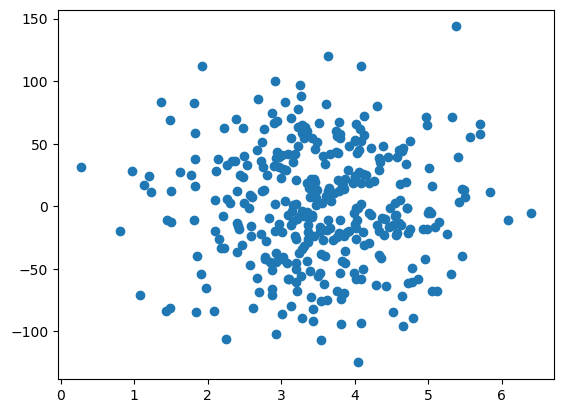

In [ ]:
# Make prediction
y_train_pred = lr.predict(X_train_sm)

# Calculate residual
res = (y_train - y_train_pred)

# Histogram residual
fig = plt.figure()
sns.distplot(res, bins=15)
plt.title('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

# Scatter plot residual
plt.scatter(X_train, res)
plt.show()

In [ ]:
# 1 Prediction the data Using testing data
# Make a prediction using testing data
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)

# 2 Evaluating with formula
# Evaulating using R*2 formula
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)

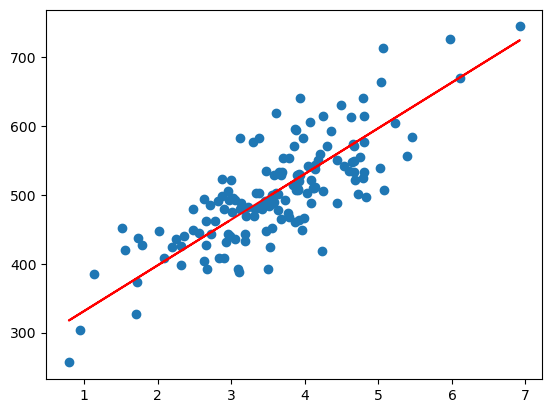

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

LAB WORK 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = 'C:\Machine Learning\week3\Posisi_gaji.csv' # data set declare
dts = pd.read_csv(dataset)

X = dts.iloc[:, 1:2].values
y = dts.iloc[:, 2].values  # Ubah menjadi satu kolom saja

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

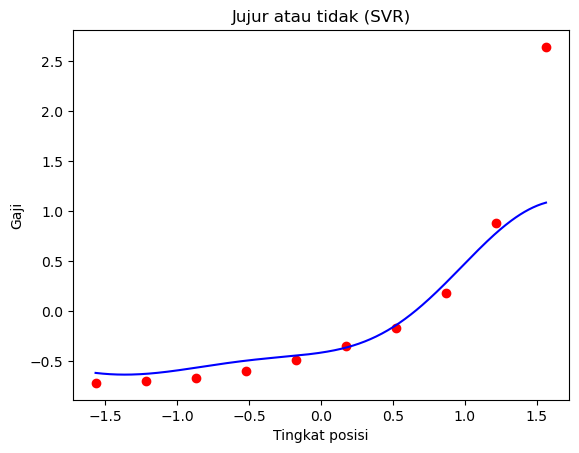

In [ ]:
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Jujur atau tidak (SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()

In [ ]:
# Create 2D Array
tingkat_posisi_prediksi = np.array([[6.5]])
# Scaled predicted data
tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi)
# Make a prediction
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)
# Rescale the result --> back to the original data
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1, 1))

In [ ]:
# Create 2D Array
tingkat_posisi_prediksi = np.array([[6.5]])
# Scaled predicted data
tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi)
# Make a prediction
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)
# Rescale the result --> back to the original data
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1, 1))

In [ ]:
# Show result
print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual = y
y_pred = regressor.predict(X)

# MAE
mae = mean_absolute_error(y_actual, y_pred)

# MSE
mse = mean_squared_error(y_actual, y_pred)

# RMSE
rmse = np.sqrt(mse)

# R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 0.22299274095734414
MSE: 0.24839989293792014
RMSE: 0.4983973243687411
R-squared: 0.7516001070620798


LAB ASSIGNMENT

General Instruction

        You will be using the "Medical Cost Personal Datasets" dataset. Make sure you have downloaded this dataset.

        Use the Python programming language and appropriate libraries such as NumPy, Pandas, Matplotlib, and Scikit-Learn to perform regression analysis and SVR.

Assignment

        1. Identify the variables that will be used as independent variables (features) and the target variable (personal medical costs).

        2. Split the dataset into training (train) and testing (test) data with an appropriate proportion.

        3. Perform feature scaling if necessary.

        4. Create a multiple linear regression model using Scikit-Learn.

        5. Train the model on the training data and make predictions on the testing data.

        6. Evaluate the model by calculating metrics such as R-squared, MSE, and MAE. Display the evaluation results.

Additional Notes

        1. Ensure to provide a brief explanation of the dataset used, including a description of relevant variables.

        2. Display relevant data visualizations such as scatter plots or other graphs if needed for better understanding.
        
        3. Analyze the results obtained in your practical assignment.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
data = 'C:\Machine Learning\week3\insurance.csv'
dts = pd.read_csv(data)

Answer nomer 1

In [ ]:
# Separate categorical and numerical columns
categorical_cols = ['sex', 'smoker', 'region']
numerical_cols = ['age', 'bmi', 'children']

# Create transformers for preprocessing
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Use ColumnTransformer to apply transformers to appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the data into training and testing sets
X = dts[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = dts['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a pipeline for linear regression
lin_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Train the linear regression model
lin_reg.fit(X_train, y_train)

# Create a pipeline for SVR
svr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SVR())
])

# Train the SVR model
svr.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_lin = lin_reg.predict(X_test)
# Calculate the mean squared error (MSE)
mse_lin = np.mean((y_pred_lin - y_test)**2)
# Print the MSE
print('MSE for linear regression:', mse_lin)

# Make predictions on the testing data
y_pred_svr = svr.predict(X_test)
# Calculate the mean squared error (MSE)
mse_svr = np.mean((y_pred_svr - y_test)**2)
# Print the MSE
print('MSE for support vector regression:', mse_svr)

MSE for linear regression: 35117755.736136325
MSE for support vector regression: 165072632.56178495


Answer Number 2

Training set size: 1003
Testing set size: 335


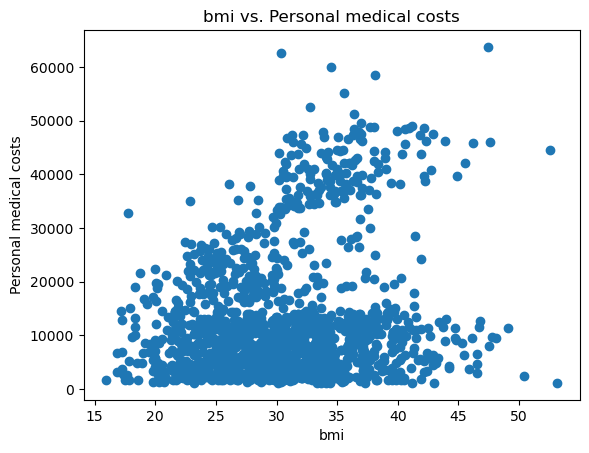

In [ ]:
# Split the data into training and testing sets with a ratio of 70:30
X_train, X_test, y_train, y_test = train_test_split(dts[['age', 'sex', 'bmi', 'children', 'smoker', 'region']], dts['charges'], test_size=0.25, random_state=42)

print('Training set size:', len(X_train))
print('Testing set size:', len(X_test))

# Create a scatter plot of age vs. personal medical costs
plt.scatter(dts['bmi'], dts['charges'])

# Add labels and title
plt.xlabel('bmi')
plt.ylabel('Personal medical costs')
plt.title('bmi vs. Personal medical costs')

# Show the plot
plt.show()


Answer Number 3

MSE for linear regression: 35117755.736136325
MSE for support vector regression: 165072632.56178495


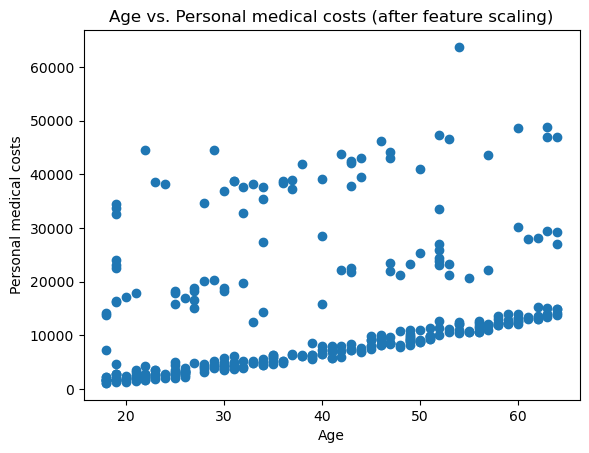

In [ ]:
# Separate categorical and numerical columns
categorical_cols = ['sex', 'smoker', 'region']
numerical_cols = ['age', 'bmi', 'children']

# Create transformers for preprocessing
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Use ColumnTransformer to apply transformers to appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the data into training and testing sets
X = dts[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = dts['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a pipeline for linear regression
lin_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Train the linear regression model
lin_reg.fit(X_train, y_train)

# Create a pipeline for SVR
svr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SVR())
])

# Train the SVR model
svr.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_lin = lin_reg.predict(X_test)

# Calculate the mean squared error (MSE)
mse_lin = np.mean((y_pred_lin - y_test)**2)

# Print the MSE
print('MSE for linear regression:', mse_lin)

# Make predictions on the testing data
y_pred_svr = svr.predict(X_test)

# Calculate the mean squared error (MSE)
mse_svr = np.mean((y_pred_svr - y_test)**2)

# Print the MSE
print('MSE for support vector regression:', mse_svr)

# Data Vizualization
plt.scatter(X_test['age'], y_test)

# Add labels and title
plt.xlabel('bmi')
plt.ylabel('Personal medical costs')
plt.title('bmi vs. Personal medical costs')

# Show the plot
plt.show()

Answer Number 4

MSE for multiple linear regression: 35117755.736136325


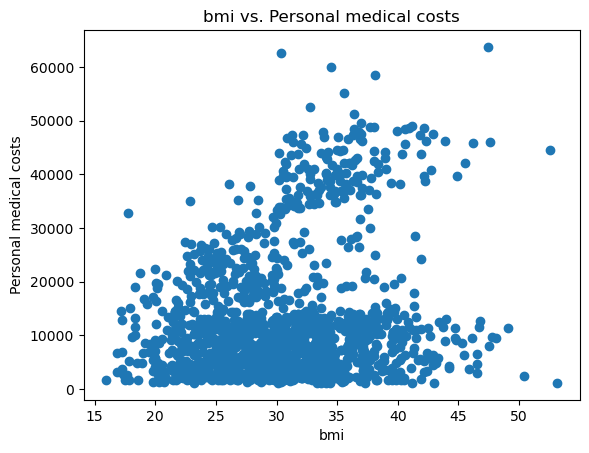

In [ ]:
# Separate categorical and numerical columns
categorical_cols = ['sex', 'smoker', 'region']
numerical_cols = ['age', 'bmi', 'children']

# Create transformers for preprocessing
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Use ColumnTransformer to apply transformers to appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the data into training and testing sets
X = dts[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = dts['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a pipeline for multiple linear regression
multiple_linear_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Train the multiple linear regression model
multiple_linear_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_multiple_linear = multiple_linear_reg.predict(X_test)

# Calculate the mean squared error (MSE)
mse_multiple_linear = np.mean((y_pred_multiple_linear - y_test)**2)

# Print the MSE
print('MSE for multiple linear regression:', mse_multiple_linear)

# Data Visualization
plt.scatter(dts['bmi'], dts['charges'])

# Add labels and title
plt.xlabel('bmi')
plt.ylabel('Personal medical costs')
plt.title('bmi vs. Personal medical costs')

# Show the plot
plt.show()

Aswer Number 5

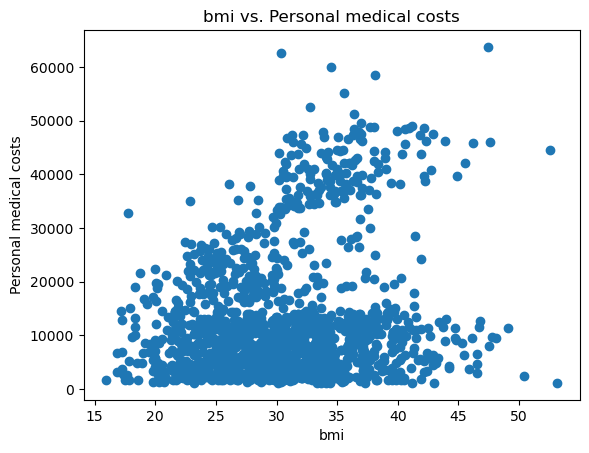

In [ ]:
# Results
# The MSE for support vector regression = 35117755.73
# The MSE for linear regression = 165072632.53

# Data Visualization
plt.scatter(dts['bmi'], dts['charges'])

# Add labels and title
plt.xlabel('bmi')
plt.ylabel('Personal medical costs')
plt.title('bmi vs. Personal medical costs')

# Show the plot
plt.show()

Answer Number 6

Linear Regression Evaluation Results:
R-squared (R2): 0.7672642952734356
Mean Squared Error (MSE): 35117755.736136325
Mean Absolute Error (MAE): 4243.654116653149

Support Vector Regression (SVR) Evaluation Results:
R-squared (R2): -0.09398492771004863
Mean Squared Error (MSE): 165072632.56178495
Mean Absolute Error (MAE): 8478.45676207452


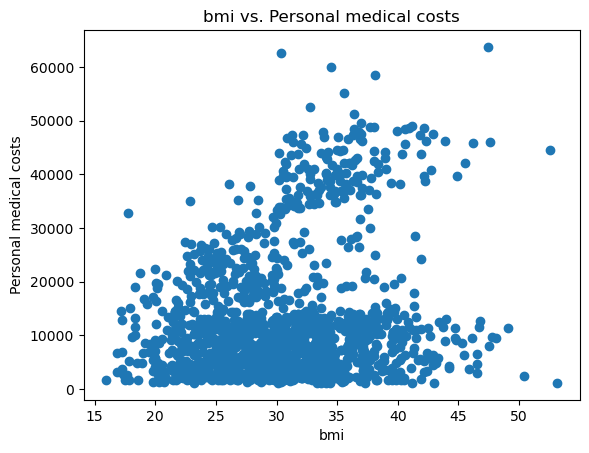

In [ ]:
# Separate categorical and numerical columns
categorical_cols = ['sex', 'smoker', 'region']
numerical_cols = ['age', 'bmi', 'children']

# Create transformers for preprocessing
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Use ColumnTransformer to apply transformers to appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the data into training and testing sets
X = dts[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = dts['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a pipeline for linear regression
lin_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Train the linear regression model
lin_reg.fit(X_train, y_train)

# Create a pipeline for SVR
svr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SVR())
])

# Train the SVR model
svr.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_lin = lin_reg.predict(X_test)

# Calculate the R-squared, MSE, and MAE for linear regression
r2_lin = r2_score(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)
mae_lin = mean_absolute_error(y_test, y_pred_lin)

# Print the evaluation results for linear regression
print('Linear Regression Evaluation Results:')
print('R-squared (R2):', r2_lin)
print('Mean Squared Error (MSE):', mse_lin)
print('Mean Absolute Error (MAE):', mae_lin)

# Make predictions on the testing data
y_pred_svr = svr.predict(X_test)

# Calculate the R-squared, MSE, and MAE for SVR
r2_svr = r2_score(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

# Print the evaluation results for SVR
print('\nSupport Vector Regression (SVR) Evaluation Results:')
print('R-squared (R2):', r2_svr)
print('Mean Squared Error (MSE):', mse_svr)
print('Mean Absolute Error (MAE):', mae_svr)

# Data Visualization
plt.scatter(dts['bmi'], dts['charges'])

# Add labels and title
plt.xlabel('bmi')
plt.ylabel('Personal medical costs')
plt.title('bmi vs. Personal medical costs')

# Show the plot
plt.show()
